# Watermark

This code puts the white pixels of an image into another image.
The location of the image can be choosen by using the variables loc_x and loc_y.
The case when the user puts values outside the image is handled.

It is possible to play with the transparency of the added image by using the variable transparency. (transparency = 0 means invisible and transparency = 255 means no transparency.

Based on the most used pixel, the watermark can be black or white. The user chooses a sensitivity with the variable sensitivity and if the most used pixel is bigger than sensitivity then watermark is black. And of course the watermak is white if the most used pixel is lesser than sensitivity. A better implementation of that would be to consider the cumulative histogram in order to have the right color for the watermark depending on if the image is more white or more black.
(the result is not very good when with a low value for transparency and black watermark)

Finally the user can choose if the watermark must appear with a rotation of 180 degrees or not by putting "yes" at the variable rota18. (if rota18 is different of "yes" there will be no rotation)



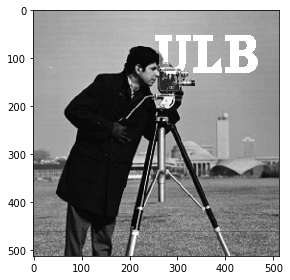

In [36]:
from matplotlib import pyplot as plt
from skimage.io import imread,imsave,imshow

image1 = imread("camera.jpg")
image2 = imread("watermark.png")

transparency = 100
rota18 = "no" #"yes"
sensitivity = 100

index = 0
h = [(image1==v).sum() for v in range(256)]
m = max(h)

index = h.index(m)
color = 'white'
if index > sensitivity : color = 'black'
    

loc_y = 50
loc_x = 250
loc_y_max = image1.shape[0] - image2.shape[0]
loc_x_max = image1.shape[1] - image2.shape[1]

if transparency < 0: transparency = 0
if transparency > 255 : transparency = 255

if loc_y < 0 : loc_y = 0
if loc_x < 0 : loc_x = 0
if loc_y > loc_y_max : loc_y = loc_y_max
if loc_x > loc_x_max : loc_x = loc_x_max



image3 = image1.copy()
for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        if image2[i][j] >= 255:
            temp = image3[loc_y+i][loc_x+j] + transparency
            if rota18 == "yes":
                if temp <=255:
                    if color == "black": temp = 255 - temp
                    image3[loc_y+ image2.shape[0] - i][loc_x+ image2.shape[1] -j] = temp
                else:
                    if color == "black" :
                        image3[loc_y+image2.shape[0] -i][loc_x+image2.shape[1] -j] = 0
                    else:
                        image3[loc_y+image2.shape[0] -i][loc_x+image2.shape[1] -j] = 255
            else:
                if temp <=255:
                    if color == "black": temp = 255 - temp
                    image3[loc_y+i][loc_x+j] = temp
                else:
                    if color == "black":
                        image3[loc_y+i][loc_x+j] = 0
                    else:
                        image3[loc_y+i][loc_x+j] = 255
            
plt.figure()
imshow(image3)
plt.show()

imsave("newimage.jpg", image3)